## Центральная предельная теорема

В этом задании я буду использовать [гамма-распределение](https://en.wikipedia.org/wiki/Gamma_distribution).

$$
    Gamma(\alpha, \lambda): \;\; f_G(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha - 1}e^{-\lambda x}
$$

Где $\Gamma(x)$ - [гамма-функция](https://en.wikipedia.org/wiki/Gamma_function). Для реализации указанной случайной величины будем использовать функцию `gamma` из модуля [numpy.random](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.random.gamma.html). В качестве параметров будем использовать следующие значения:

$$
\alpha = 9 \;\;\; \lambda = 0.5
$$

In [75]:
import numpy as np
import matplotlib.pylab as pl
from numpy.random import gamma as gamma_dist   # gamma distribution
from scipy.special import gamma as gamma_func
from functools import partial
from scipy.stats import norm

%matplotlib inline

In [61]:
ALPHA = 9
LAMBDA = 0.5

def theoretical_gamma_(x, lamb, alph):
    return np.power(lamb, alph)/gamma_func(alph)*np.power(x, alph - 1) * np.exp(-lamb*x)
theoretical_gamma = partial(theoretical_gamma_, lamb = LAMBD, alph = ALPHA)

def gamma(alph, lambd, *args, **kargs):
    return gamma_dist(alph, np.power(lambd, -1), *args, **kargs)

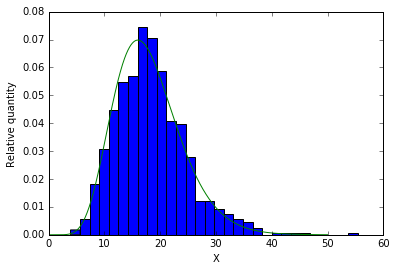

In [92]:
generated = gamma(ALPHA, LAMBDA, 1000)
X = np.linspace(0, 50, 1000)
y = theoretical_gamma(X)
n, bins, patches = pl.hist(generated, 30, normed=1)
pl.plot(X, y)
pl.ylabel('Relative quantity')
pl.xlabel("X")
pl.show()

> Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

$$
\mathbb{E}\:Gamma(\alpha, \lambda) = \alpha/\lambda \;\;\; \mathbb{D}\:Gamma(\alpha, \lambda) = \alpha/\lambda^2
$$

In [76]:
EXP = ALPHA / LAMBDA
VAR = ALPHA / (LAMBDA * LAMBDA)
print("Expectation = %f, variance = %f" % (EXP, VAR))

Expectation = 18.000000, variance = 36.000000


То есть для $\xi \in Gamma(9, 0.5)$ имеем:

$$
\mathbb{E}\:\xi = 18 \;\;\; \mathbb{D}\:\xi = 36
$$

## n = 5

Для каждого размера семпа выводим гистограмму, оценку математического ожидания и квадрат стандартного отклонения, то есть оценку дисперсии, помня, что оно должно быть примерно равно $\frac{\mathbb{D}\:\xi}{n}$. Формулы для вычисления праметров нормального распределения, аппроксимирующего гистограмму можно увидеть в коде.

In [90]:
def clt(dim, nsamples):
    """
    clt      generates (dim, nsamples) matrix from gamma distribution
             plots histogram of mean values and expected normal distribution according to CLT
             prints out received sample size and expected expectation, variance
    
    Input:
    dim      size of sample
    nsamples number of samples
    
    NOTE:    histogram is normalized
    """
    gend = gamma(ALPHA, LAMBDA, (dim, nsamples))
    gend_mean = np.mean(gend, axis=0)
    n, bins, patches = pl.hist(gend_mean, 3/100 * nsamples, normed=1)
    X = np.linspace(0, 50, 1000)
    y = norm.pdf(X, EXP, VAR / dim)
    pl.plot(X, y)
    pl.ylabel('Relative quantity')
    pl.xlabel("X")
    pl.show()
    exp = gend_mean.mean()
    var = gend_mean.std()
    print("Sample size = %d, expectation = %f, variance = %f"% (dim, exp, var))


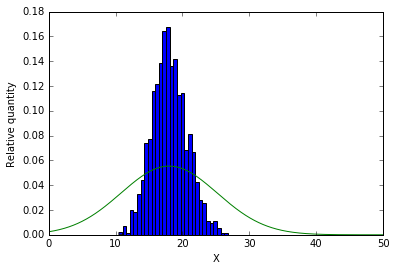

Sample size = 5, expectation = 18.027820, variance = 2.607520


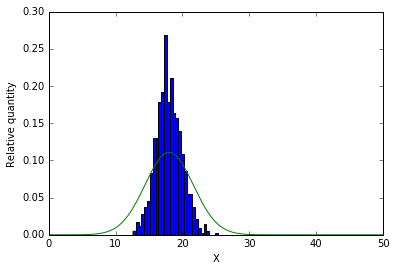

Sample size = 10, expectation = 17.942981, variance = 1.910089


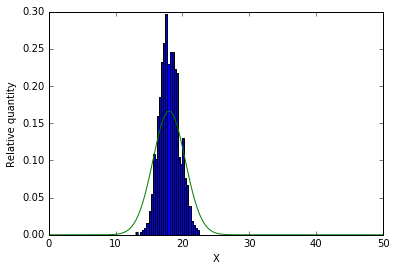

Sample size = 15, expectation = 18.001767, variance = 1.469336


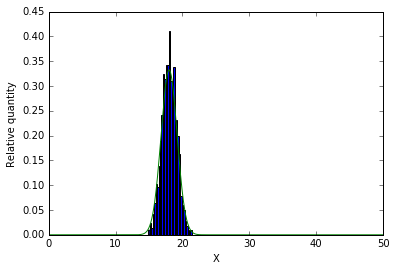

Sample size = 30, expectation = 17.989404, variance = 1.079183


In [91]:
clt(5, 1000)
clt(10, 1000)
clt(15, 1000)
clt(30, 1000) # just checking

## Выводы

> Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

По приведенным выше графикам и оценкам математических ожиданий и дисперсий, мы можем предположить, что для гамма-распределения выполняется центральная предельная теорема. При большем значении параметра `n` гауссиана аппроксимирует гистограмму лучшим способом. Точность аппроксимации выборочных средних нормальным с ростом `n` растет.